Since python is not much compatible as matlab. So i plot the mode propagation  in restricted to only core. There is hurdel to plot continous graph in differet intervals. and also use other sotware to extract the intersection point of the graph. 

For running this code, you can directly upload on google colab and run it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
import sympy
from sympy import Symbol, solve, Eq
from sympy import *
import scipy
from scipy import optimize
from scipy.optimize import fsolve

In [2]:
## Constant value
lamda = 1.550  ## wavelength
c0 = 3.0e8       ## speed of light
f = c0/lamda     ## frecuency
ang_f = 2.0*np.pi*f   ## angular frecuency
k = (2.0*np.pi)/lamda
nc = 3.4778
nuc = 1.000
nlc = 1.4657
d = 0.7000


<ipython-input-3-5565c2fc1a60>:8: RuntimeWarning: divide by zero encountered in true_divide
  RHS = np.arctan(kc/kd) + np.arctan(ks/kd)


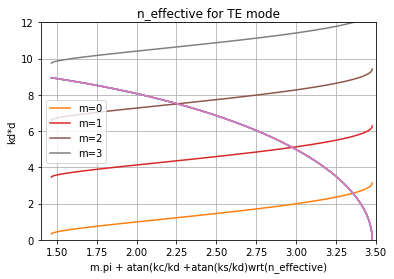

In [3]:
## for TE mode
neff = np.linspace(nlc,nc,1000)

kd = (k*(np.sqrt(nc**2 - neff**2)))
ks = (k*(np.sqrt(neff**2 - nlc**2)))
kc = (k*(np.sqrt(neff**2 - nuc**2)))
LHS = kd*d 
RHS = np.arctan(kc/kd) + np.arctan(ks/kd)

## m= 0
RHS_0 = (0*np.pi) + RHS
plt.plot(neff,LHS)
plt.plot(neff,RHS_0,label ='m=0') 

# m= 1
RHS_1 = (1.0*np.pi) + RHS
plt.plot(neff,LHS)
plt.plot(neff,RHS_1,label ='m=1') 

# m= 2
RHS_2 = (2.0*np.pi) + RHS
plt.plot(neff,LHS)
plt.plot(neff,RHS_2,label ='m=2') 

# m= 3
RHS_3 = (3.0*np.pi) + RHS
plt.plot(neff,LHS)
plt.plot(neff,RHS_3,label ='m=3') 

plt.grid()
plt.title("n_effective for TE mode")
plt.xlabel("m.pi + atan(kc/kd +atan(ks/kd)wrt(n_effective)")
plt.ylabel("kd*d")
plt.xlim(1.4,3.5)
plt.ylim(0,12)
plt.legend()
plt.show()


In [4]:
#### list of n_effective for TE mode
neff_0 = 3.3539 # m=0
neff_1 = 2.9642 # m=1
neff_2 = 2.2521 # m=0

<Figure size 360x360 with 0 Axes>

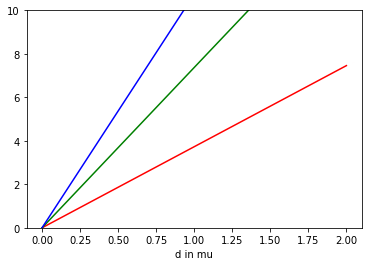

<Figure size 360x360 with 0 Axes>

In [5]:
##### value od d for supporting 0,1,2 mode
d0 = np.linspace(0,2,100)  ## in micrometer
#mode= [0,1,2]
kdd0 = (k*(np.sqrt(nc**2 - neff_0**2)))
ksd0 = (k*(np.sqrt(neff_0**2 - nlc**2)))
kcd0 = (k*(np.sqrt(neff_0**2 - nuc**2)))
LHS0 = (kdd0*d0) 
#RHS0 = mode*np.pi+np.arctan(ksd0/kdd0) + np.arctan(ks/kdd0)
kdd1 = (k*(np.sqrt(nc**2 - neff_1**2)))
kdd2 = (k*(np.sqrt(nc**2 - neff_2**2)))
LHS1 = (kdd1*d0)
LHS2 = (kdd2*d0)

plt.plot(d0,LHS0,'r',d0,LHS1,'g',d0,LHS2,'b')

plt.xlabel("d in mu")
plt.ylim(0, 10)
plt.figure(figsize=(5,5))

<ipython-input-6-261a1c2f91f3>:7: RuntimeWarning: divide by zero encountered in true_divide
  RHS_tm = np.arctan((kc/kd)*(nc**2/nuc**2)) + np.arctan((ks/kd)*(nc**2/nlc**2))


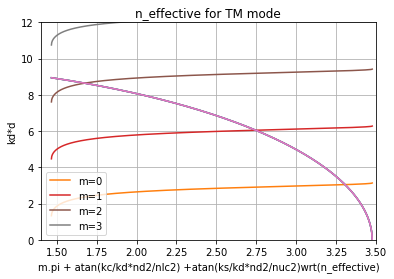

In [6]:
## for TM mode

kd = (k*(np.sqrt(nc**2 - neff**2)))
ks = (k*(np.sqrt(neff**2 - nlc**2)))
kc = (k*(np.sqrt(neff**2 - nuc**2)))
LHS_tm = kd*d 
RHS_tm = np.arctan((kc/kd)*(nc**2/nuc**2)) + np.arctan((ks/kd)*(nc**2/nlc**2))

## m= 0
RHStm_0 = (0*np.pi) + RHS_tm
plt.plot(neff,LHS)
plt.plot(neff,RHStm_0,label ='m=0') 

# m= 1
RHStm_1 = (1.0*np.pi) + RHS_tm
plt.plot(neff,LHS)
plt.plot(neff,RHStm_1,label ='m=1') 

# m= 2
RHStm_2 = (2.0*np.pi) + RHS_tm
plt.plot(neff,LHS)
plt.plot(neff,RHStm_2,label ='m=2') 

# m= 3
RHStm_3 = (3.0*np.pi) + RHS_tm
plt.plot(neff,LHS)
plt.plot(neff,RHStm_3,label ='m=3') 

plt.grid()
plt.title("n_effective for TM mode")
plt.xlabel("m.pi + atan(kc/kd*nd2/nlc2) +atan(ks/kd*nd2/nuc2)wrt(n_effective)")
plt.ylabel("kd*d")
plt.xlim(1.4,3.5)
plt.ylim(0,12)
plt.legend()
plt.show()


In [7]:
#### list of n_effective for TM mode
neff_0tm = 3.3061 # m=0
neff_1tm = 2.7457 # m=1
neff_2tm = 1.6684 # m=2

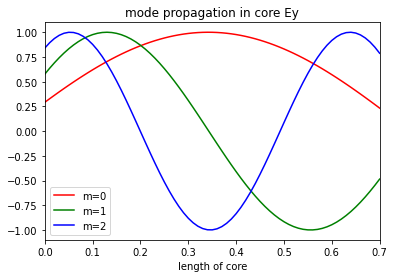

In [8]:
###### ploting E and H
### since in TE mode only Ey and Hx and Hz component is available

### ploting for core


nef0 = 3.3539   ### at m=0 n_effective value
nef1 = 2.9642   ### at m=1 n_effective value
nef2 = 2.2521   ### at m=2 n_effective value

k_d0 = (k*np.sqrt((np.power(nc,2)) - (np.power(nef0,2))))    ## wave vector in core
k_s0 = (k*np.sqrt((np.power(nef0,2)) - (np.power(nlc,2))))   ## wave vector in lower substract
k_c0 = (k*np.sqrt((np.power(nef0,2)) - (np.power(nuc,2))))   ## wave vector in upper layer

### define Ey in three region
#x = np.linspace(-2,2,1000)
phi_s0 = np.arctan(k_s0/k_d0)

## core 
xd = np.arange(0.000,.7100,0.01)
Ey0 = np.cos(k_d0*xd - phi_s0)
plt.plot(xd,Ey0, "r",label='m=0')

k_d1 = (k*np.sqrt((np.power(nc,2)) - (np.power(nef1,2))))    ## wave vector in core
k_s1 = (k*np.sqrt((np.power(nef1,2)) - (np.power(nlc,2))))   ## wave vector in lower substract
k_c1 = (k*np.sqrt((np.power(nef1,2)) - (np.power(nuc,2))))   ## wave vector in upper layer

### define Ey in three region
#x = np.linspace(-2,2,1000)
phi_s1 = np.arctan(k_s1/k_d1)
Ey1 = np.cos(k_d1*xd - phi_s1)
plt.plot(xd,Ey1, "g",label='m=1')

k_d2 = (k*np.sqrt((np.power(nc,2)) - (np.power(nef2,2))))    ## wave vector in core
k_s2 = (k*np.sqrt((np.power(nef2,2)) - (np.power(nlc,2))))   ## wave vector in lower substract
k_c2 = (k*np.sqrt((np.power(nef2,2)) - (np.power(nuc,2))))   ## wave vector in upper layer

### define Ey in three region
#x = np.linspace(-2,2,1000)
phi_s2 = np.arctan(k_s2/k_d2)
Ey2 = np.cos(k_d2*xd - phi_s2)
plt.plot(xd,Ey2, "b",label='m=2')

plt.xlim(0.00,0.700)
plt.legend()
plt.xlabel('length of core')
plt.title('mode propagation in core Ey')
plt.show()


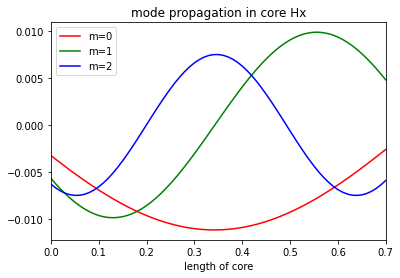

In [9]:
### ploting of Hx and Hz
## for Hx

beta0 = k*nef0
mu = 1.0*10e-7
Hx0 = (-beta0/(ang_f *mu))*np.cos(k_d0*xd - phi_s0)
plt.plot(xd,Hx0, 'r', label='m=0')

beta1 = k*nef1
mu = 1.0*10e-7
Hx1 = (-beta1/(ang_f *mu))*np.cos(k_d1*xd - phi_s1)
plt.plot(xd,Hx1,'g', label='m=1')

beta2 = k*nef2
mu = 1.0*10e-7
Hx2 = (-beta2/(ang_f *mu))*np.cos(k_d2*xd - phi_s2)
plt.plot(xd,Hx2,'b', label='m=2')

plt.xlim(0.00,0.700)
plt.legend()
plt.xlabel('length of core')
plt.title('mode propagation in core Hx')
plt.show()


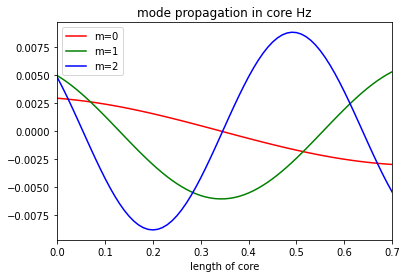

In [10]:
## for Hz
Hz0 = (-k_d0/(ang_f*mu))*np.sin(k_d0*xd - phi_s0)
plt.plot(xd,Hz0,'r', label='m=0')

Hz1 = (-k_d1/(ang_f*mu))*np.sin(k_d1*xd - phi_s1)
plt.plot(xd,Hz1,'g', label='m=1')

Hz2 = (-k_d2/(ang_f*mu))*np.sin(k_d2*xd - phi_s2)
plt.plot(xd,Hz2,'b', label='m=2')

plt.xlim(0.00,0.700)
plt.legend()
plt.xlabel('length of core')
plt.title('mode propagation in core Hz')
plt.show()